<a href="https://colab.research.google.com/github/shrinidhib/dog-breed-prediction/blob/main/dog_breed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
#!unzip "/content/drive/MyDrive/dog-vision-colab/dog-breed-identification.zip" -d "/content/drive/MyDrive/dog-vision-colab"

#End-to-end multiclass dogbreed classification

this notebook builds an image classifier using TensorFlow and TensorFlow Hub

## 1. Problem

Identifying dog breed

## 2. Data

kaggle dog breed identification

## 3. Evaluation

file with prediction probabilities for each dog breed

## 4. Features

* Unstructured data - deep learning/ transfer learning
* multiclass classification - 120 breeds
* 10000+ images in training set
* 10000+ images in test set

**Getting workspace ready**

In [3]:
import tensorflow as tf
import tensorflow_hub as hub
print("TF Version: ", tf.__version__)
print("TF Hub Version: ", hub.__version__)

#check for gpu availability

print("GPU", "yes" if tf.config.list_physical_devices("GPU") else "no")

TF Version:  2.15.0
TF Hub Version:  0.16.1
GPU yes


# Getting data ready
turning into Tensors
Data has to be in numerical format

* lets start by accessing data and checking out labels

In [4]:
import pandas as pd

labels_csv=pd.read_csv("/content/drive/MyDrive/dog-vision-colab/labels.csv")
print(labels_csv.describe())
print(labels_csv.head())

                                      id               breed
count                              10222               10222
unique                             10222                 120
top     000bec180eb18c7604dcecc8fe0dba07  scottish_deerhound
freq                                   1                 126
                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever


<Axes: >

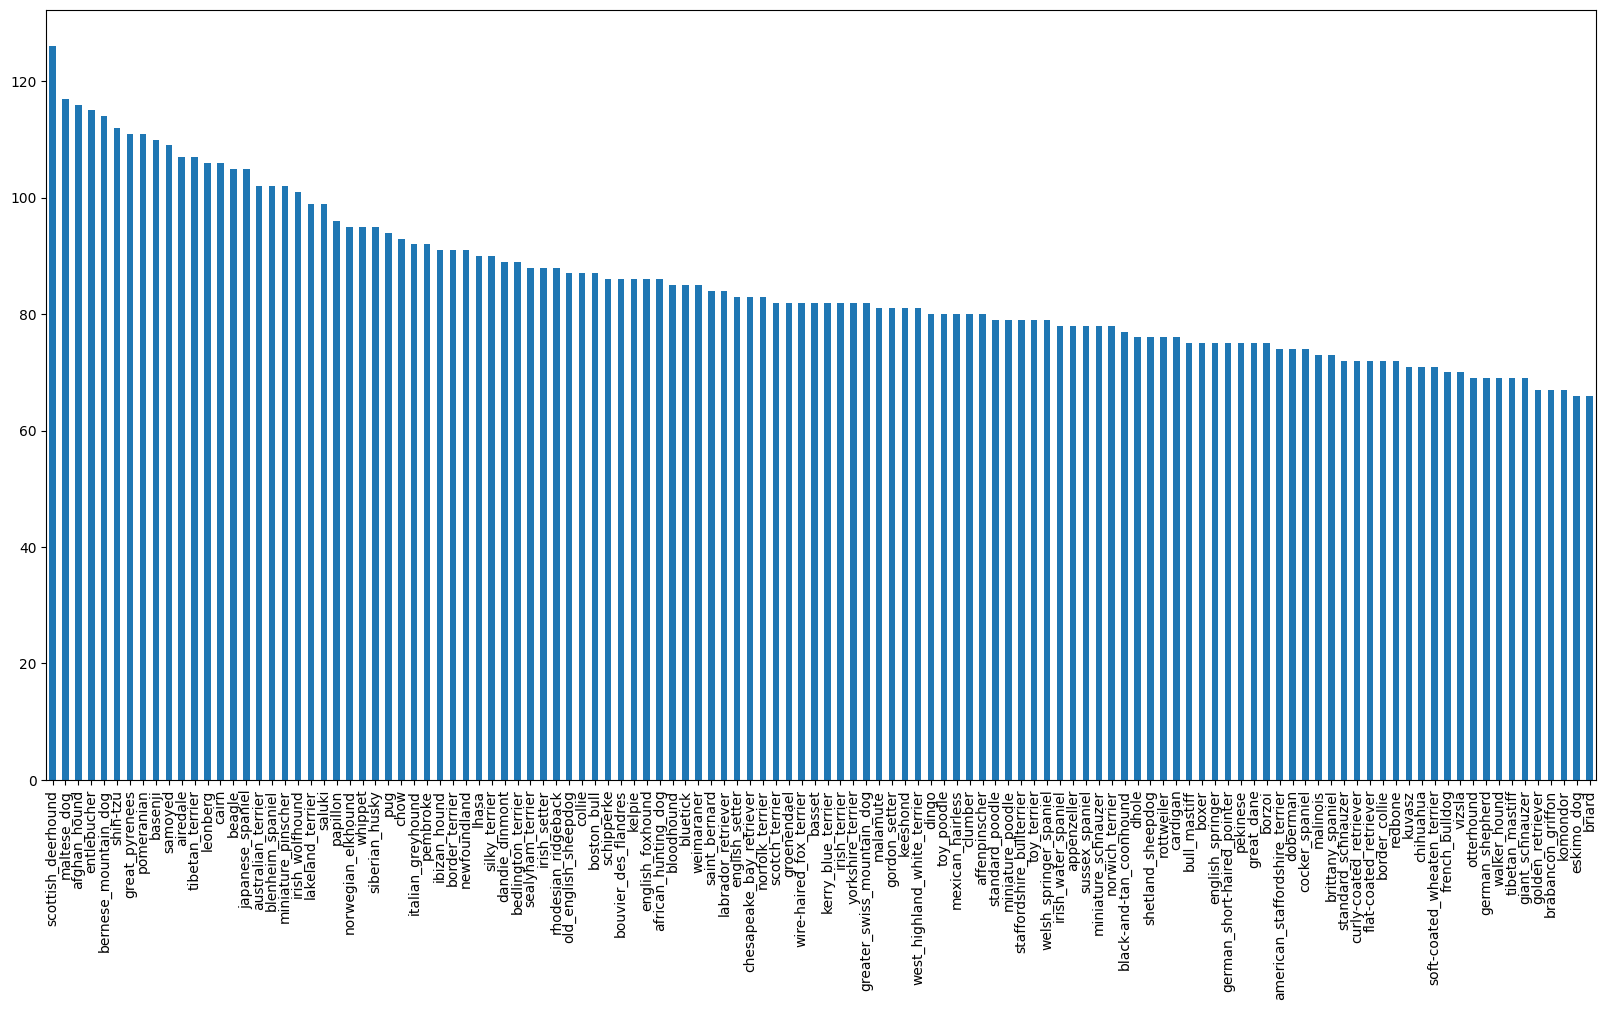

In [5]:
# How many images per greed
labels_csv.breed.value_counts().plot.bar(figsize=(20,10))

In [6]:
labels_csv['breed'].value_counts().median()

82.0

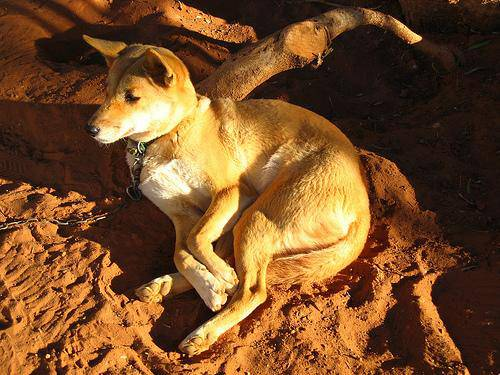

In [7]:
from IPython.display import Image
Image("drive/My Drive/dog-vision-colab/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg")

### Getting imags and their labels

In [8]:
labels_csv.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [9]:
filenames=["drive/My Drive/dog-vision-colab/train/"+fname+ ".jpg" for fname in labels_csv['id']]

filenames[:10]

['drive/My Drive/dog-vision-colab/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/My Drive/dog-vision-colab/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/My Drive/dog-vision-colab/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/My Drive/dog-vision-colab/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/My Drive/dog-vision-colab/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/My Drive/dog-vision-colab/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/My Drive/dog-vision-colab/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/My Drive/dog-vision-colab/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/My Drive/dog-vision-colab/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/My Drive/dog-vision-colab/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [10]:
len(filenames)

10222

In [11]:
import os
if len(os.listdir("drive/My Drive/dog-vision-colab/train/"))==len(filenames):
  print('all files extracted')

In [12]:
import numpy as np
labels=np.array(labels_csv.breed)
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [13]:
len(labels)

10222

In [14]:
# check if number of labels matches the number of files
if (len(labels)==len(filenames)):
  print("No missing data")

No missing data


In [15]:
unique_breeds=np.unique(labels)
unique_breeds

array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
       'american_staffordshire_terrier', 'appenzeller',
       'australian_terrier', 'basenji', 'basset', 'beagle',
       'bedlington_terrier', 'bernese_mountain_dog',
       'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
       'bluetick', 'border_collie', 'border_terrier', 'borzoi',
       'boston_bull', 'bouvier_des_flandres', 'boxer',
       'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff',
       'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua',
       'chow', 'clumber', 'cocker_spaniel', 'collie',
       'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo',
       'doberman', 'english_foxhound', 'english_setter',
       'english_springer', 'entlebucher', 'eskimo_dog',
       'flat-coated_retriever', 'french_bulldog', 'german_shepherd',
       'german_short-haired_pointer', 'giant_schnauzer',
       'golden_retriever', 'gordon_setter', 'great_dane',
      

In [16]:
#Turn a single label into array of booleans
print(labels[0])
labels[0]==unique_breeds

boston_bull


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [17]:
# turn every label into boolean array
boolean_labels=[label==unique_breeds for label in labels]
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [18]:
# Turning boolean array into integers
print(labels[0])
print(np.where(unique_breeds==labels[0])) # index where label occurs
print(boolean_labels[0].argmax()) # index where label occurs in boolean_array
print(boolean_labels[0].astype(int))

boston_bull
(array([19]),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


### Creating our own validation set


In [19]:
X = filenames
y = boolean_labels

# start of experimenting with a thousand images

NUM_IMAGES=1000 #@param {type: 'slider', min: 1000, max: 10000, step: 1000}



In [20]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val=train_test_split(X[:NUM_IMAGES],
                                                y[:NUM_IMAGES],
                                                test_size=0.2,
                                                random_state=42)

len(x_train), len(y_train), len(x_val), len(y_val)

(800, 800, 200, 200)

## Preprocessing images


> turning images into tensors

**preprocessing function**
1. image filepath as input
2. convert to image variable
3. image to tensors
4. normalise image
5. resize image to be a shape of 224,224
6. return modified image

In [21]:
from matplotlib.pyplot import imread
image=imread(filenames[42])
image.shape
# height width color-channel

(257, 350, 3)

array([[[ 89, 137,  89],
        [ 76, 124,  76],
        [ 63, 111,  61],
        ...,
        [ 77, 133,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  75],
        [ 67, 114,  68],
        [ 63, 110,  64],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 132,  84]],

       [[ 56, 104,  66],
        [ 58, 106,  68],
        [ 64, 112,  74],
        ...,
        [ 71, 127,  82],
        [ 73, 129,  84],
        [ 74, 130,  85]],

       ...,

       [[  2,  11,  10],
        [  5,  14,  11],
        [  8,  14,  14],
        ...,
        [120, 113,  67],
        [126, 118,  71],
        [122, 114,  67]],

       [[  0,   3,   7],
        [  2,   7,  10],
        [  3,   9,   7],
        ...,
        [105,  98,  54],
        [112, 104,  58],
        [111, 103,  57]],

       [[ 16,  18,  30],
        [ 16,  19,  24],
        [ 15,  20,  14],
        ...,
        [101,  92,  51],
        [ 97,  88,  47],
        [120, 111,  70]]], dtype=uint8)
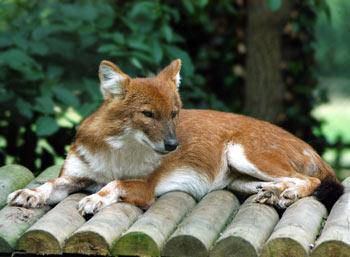

In [22]:
image

In [23]:
#turn image into tensor
tf.constant(image)

<tf.Tensor: shape=(257, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  89],
        [ 76, 124,  76],
        [ 63, 111,  61],
        ...,
        [ 77, 133,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  75],
        [ 67, 114,  68],
        [ 63, 110,  64],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 132,  84]],

       [[ 56, 104,  66],
        [ 58, 106,  68],
        [ 64, 112,  74],
        ...,
        [ 71, 127,  82],
        [ 73, 129,  84],
        [ 74, 130,  85]],

       ...,

       [[  2,  11,  10],
        [  5,  14,  11],
        [  8,  14,  14],
        ...,
        [120, 113,  67],
        [126, 118,  71],
        [122, 114,  67]],

       [[  0,   3,   7],
        [  2,   7,  10],
        [  3,   9,   7],
        ...,
        [105,  98,  54],
        [112, 104,  58],
        [111, 103,  57]],

       [[ 16,  18,  30],
        [ 16,  19,  24],
        [ 15,  20,  14],
        ...,
        [101,  92,  5

In [24]:
IMG_SIZE=224

# function

def process_image(img_path, img_size=IMG_SIZE):
  """ takes an image filepath and turns into tensor"""
  image=tf.io.read_file(img_path)

  #turn into numerical tensor with RGB
  image=tf.image.decode_jpeg(image,channels=3)

  #normalise
  image=tf.image.convert_image_dtype(image, tf.float32)

  #resize
  image=tf.image.resize(image, size=[img_size, img_size])

  return image

## Turning data into batch

32- batch size

data in form of tensor tuples
`(image,label)`

In [25]:
def get_image_label(image_path, label):
  image=process_image(image_path)
  return image, label

In [28]:
# to turn data into batches
BATCH_SIZE=32

def create_data_batches(X,y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
  """
  cretaes batches of data out of image x and label y.
  shuffles data if training and doesnt if validation
  also accepts test data as input(no labels)
  """
  if test_data:
    print("Creating test data batches...")
    data=tf.data.Dataset.from_tensor_slices((tf.constant(X)))
    data_batch=data.map(process_image).batch(batch_size)
    return data_batch

  elif valid_data:
    # dont shuffle
    print("Creatin validation data batches...")
    data=tf.data.Dataset.from_tensor_slices((tf.constant(X),
                                             tf.constant(y)))
    data_batch=data.map(get_image_label).batch(batch_size)
    return data_batch

  else:
    print("Create training data batches..")
    #shuffle
    data=tf.data.Dataset.from_tensor_slices((tf.constant(X),tf.constant(y)))

    data=data.shuffle(buffer_size=len(X))

    data=data.map(get_image_label)

    data_batch=data.batch(batch_size)
    return data_batch



In [29]:
train_data=create_data_batches(x_train,y_train)
val_data=create_data_batches(x_val,y_val, valid_data=True)

Create training data batches..
Creatin validation data batches...


In [30]:
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))